In [1]:
%pip install konlpy seaborn matplotlib pandas xlrd openpyxl wordcloud koreanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

In [25]:
import pandas as pd
from konlpy.tag import Okt

# 데이터 가져오기
df = pd.read_excel("분석할 데이터.xlsx")

# okt 설정
okt = Okt()

# 키워드 추출
nouns = []
for text in df['제목']:
    nouns.extend( okt.nouns(text) )

# 키워드 갯수 세기
counter = {}
for noun in nouns:
    counter[noun] = counter.get(noun, 0) + 1


In [27]:
import pandas as pd
from konlpy.tag import Okt

# 데이터 가져오기
df = pd.read_excel("분석할 데이터.xlsx")

# okt 설정
okt = Okt()

# 키워드 추출
nouns = []
for text in df['제목']:
    nouns+=okt.nouns(text)

# 키워드 갯수 세기
counter = {}
for noun in nouns:
    counter[noun] = counter.get(noun, 0) + 1


In [28]:
counter

{'반도체': 21,
 '사상': 6,
 '최대': 16,
 '투자': 46,
 '애플': 36,
 '엔비디아': 18,
 '스페이스': 3,
 '누적': 13,
 '유심': 56,
 '교체': 48,
 '율': 17,
 '갤럭시': 17,
 '워치': 8,
 '사양': 2,
 '정보': 20,
 '색상': 1,
 '스마트폰': 10,
 '더': 19,
 '삼성': 65,
 '프리미엄': 1,
 '관세': 5,
 '압박': 3,
 '돌파': 16,
 '두': 8,
 '달': 23,
 '대규모': 8,
 '구조조정': 1,
 '계획': 6,
 '일자리': 4,
 '대체': 9,
 '가속': 10,
 '결과': 5,
 '네이버': 65,
 '개인': 4,
 '판매': 10,
 '과': 22,
 '노출': 3,
 '전자상거래': 1,
 '법': 11,
 '논란': 19,
 '또': 22,
 '천명': 2,
 '감원': 2,
 '예고': 14,
 '인력': 9,
 '재편': 3,
 '김상철': 1,
 '한국': 48,
 '티어': 6,
 '한컴': 2,
 '내년': 10,
 '상반기': 4,
 '코스닥': 2,
 '상장': 6,
 '치': 8,
 '직': 7,
 '이재명': 15,
 '대통령': 20,
 '암살': 4,
 '발언': 5,
 '스트리머': 2,
 '채널': 5,
 '차단': 5,
 '넵튠': 1,
 '애드': 1,
 '테크': 20,
 '거래': 8,
 '액': 5,
 '최경': 1,
 '에스티': 1,
 '젠': 17,
 '바이오': 33,
 '대표': 13,
 '수주': 7,
 '미팅': 2,
 '활발': 2,
 '로': 44,
 '포트폴리오': 1,
 '확장': 11,
 '술': 3,
 '숙취': 1,
 '싹': 5,
 '개': 20,
 '제품': 5,
 '중': 24,
 '진짜': 6,
 '효과': 9,
 '살': 3,
 '수소': 2,
 '비행기': 4,
 '세계': 29,
 '일주': 1,
 '과학': 15,
 '모험가': 1,
 '마지막':

In [31]:
pd.DataFrame(
    {"키워드" : counter.keys(),
     "빈도수" : counter.values()}
).to_excel("키워드 분석 결과.xlsx", index=False)

In [29]:
df['키워드'].value_counts()

키워드
반도체    1
드레싱    1
논리     1
희생     1
방지책    1
      ..
체결     1
지갑     1
자금     1
조달     1
위원     1
Name: count, Length: 3778, dtype: int64

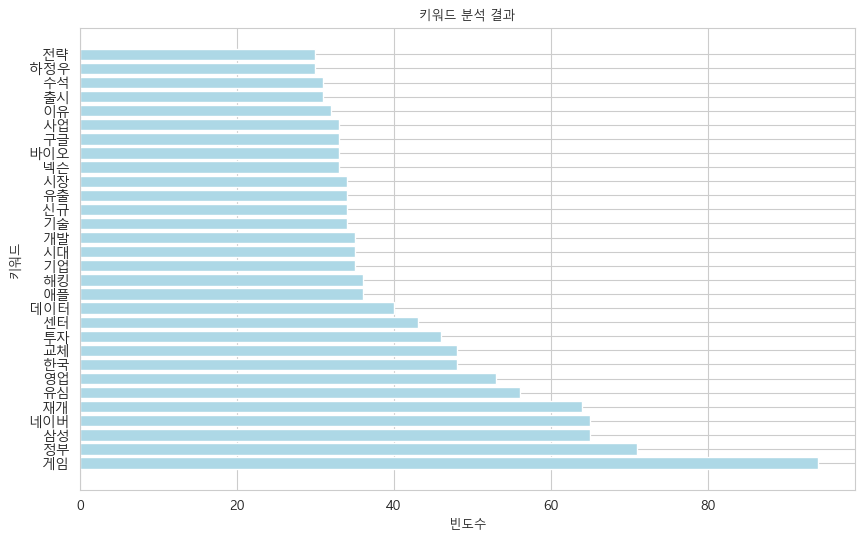

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

df = pd.read_excel("키워드 분석 결과.xlsx")

#  (one-letter word)는 빼자
df = df[df['키워드'].str.len() > 1]

#  10  20   30  
df = df.sort_values(by='빈도수', ascending=False).head(30)

plt.figure(figsize=(10, 6))
plt.barh(df['키워드'], df['빈도수'], color='lightblue')
plt.title('키워드 분석 결과', fontproperties=font)
plt.xlabel('빈도수', fontproperties=font)
plt.ylabel('키워드', fontproperties=font)
plt.show()


출처는 https://news.naver.com/section/105이다